In [1]:
import numpy
import math
import os
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

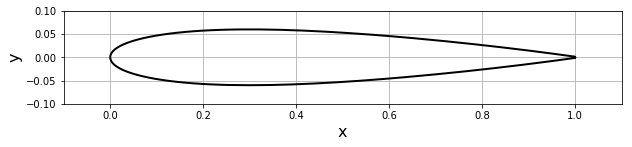

In [6]:
# import the naca airfoil
naca_filepath = os.path.join('naca0012.dat')
# we did this so that you can use this file on windows or linux
with open (naca_filepath, 'r') as file_name:
    x,y = numpy.loadtxt(file_name, dtype=float, delimiter='\t', unpack=True)
    
# plot it up
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);

In [8]:
# define the panel class slightly differently

class Panel:
    def __init__(self, xa, ya, xb, yb):
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, xa
        
        self.xc, self.yc = (xa +xb)/2, (ya +yb)/2
        self.length  = math.sqrt((xb-xa)**2+(yb-ya)**2)
        
        # orientation of the panel
        if xb - xa <= 0.0:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb - xa > 0.0:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        # location of the panel
        if self.beta <= math.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'
        
        self.sigma = 0.0 # source strength
        self.vt = 0.0 # tangential velocity
        self.cp = 0.0 # pressure coefficient

In [ ]:
# we want to get uneven panel distribution along the airfoil surface 
# so use a circle whos diameter is the airfoil's chord length

def define_panels(x,y,N=40):
    # define the circle and its coordinates
    R = (x.max() - x.min())/2
    x_center = (x.max()+x.min())/2
    x_circle = x_center + R*numpy.cos(numpy.linspace(0.0, 2*math.pi, N+1))
    